In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

# Creating the data

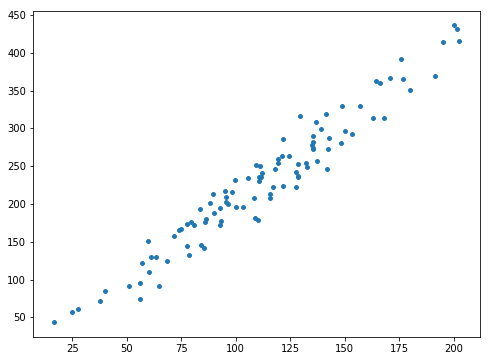

In [35]:
# let's create some random data

x = np.random.normal(100, 40, 100) 
y = 2*x + 3 + np.random.normal(0, 20, 100)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=15)

# Building the model

In [36]:
class LinRegress:
    '''Linear Regression using Gradient Descent
    
    attributes:
    alpha - Learning Rate
    iters - Number of Iterations'''
    
    def __init__(self, alpha = 0.05, iters = 1000):
        self.alpha = alpha
        self.iters = iters
        
    def fit(self, X, Y):
        '''This method finds all the coefficients in the model from the training data
        
        arguments:
        X - array type - The input dataset
        Y - an array vector - The target variables
        '''
        
        def standardize(dataset):
            '''this function standardizes the data'''
            
            # these two will be useful when predicting
            self.mean = np.mean(dataset, axis=0)
            self.std = np.std(dataset, axis=0)
            
            return (dataset - np.mean(dataset, axis=0))/np.std(dataset, axis=0)
        
        
        def normalize(dataset):
            '''this function normalizes the data'''
            return (dataset - np.min(dataset, axis=0))/(np.max(dataset, axis=0) - np.min(dataset, axis=0))
        
        # we standardize the data in this case since it's normally distributed
        # always normalize or standardize to avoid overflow errors
        X = standardize(X)
        # next we concatenate a '1 vector' to account for X0 (feature of theta0)
        X = np.c_[np.ones(X.shape[0]), X]
        # randomly initializing the coefficients (the thetas)
        coeffs = np.random.randn(X.shape[1])
        m = len(Y)
        
        def gradient_descent(alpha, iters, X, Y, coeffs):
            cost_func_list = []
            for i in range(iters):
                predicted_values = np.dot(X, coeffs)
                actual_values = Y
                error_values = predicted_values - actual_values
                derivative_values = np.dot(X.T, error_values)/m
                cost_func = 1/(2*m)*((error_values**2).sum())
                cost_func_list.append(cost_func)
                coeffs = coeffs - alpha * derivative_values
                
            # usefull for plotting the best fit line
            self.X = X 
            self.Y = Y
            
            return coeffs, cost_func_list
        
        self.coeffs, self.cost_func_list = gradient_descent(self.alpha, self.iters,
                                                            X, Y, coeffs)
    
    def predict(self, xi):
        '''this function predicts the target variable for a given observation'''

        xi = (xi - self.mean)/self.std # normalize the observation
        xi = np.insert(xi, 0, 1)
        target = np.dot(xi, self.coeffs)
        return target
            
    def plot_cost_func(self):
        '''this functions plots the various values of cost func over the iterations'''
        plt.figure(figsize=(8, 6))
        plt.plot(self.cost_func_list)
        plt.show()
        
    def plot_bestFitLine(self):
        '''this function plots the best fit line in case of two dimensions'''
        X = self.X
        Y = self.Y
        if len(X.shape) == 2:
            predicts = np.dot(X, self.coeffs)
            plt.figure(figsize=(8, 6))
            plt.scatter(X[:, 1], Y)
            plt.plot(X[:, 1], predicts, c='orange')
            plt.show()

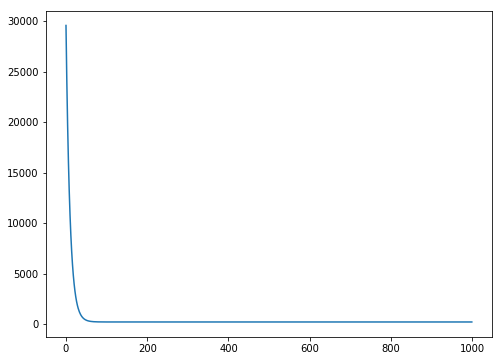

In [37]:
# now let's test our classifier
lg = LinRegress()
lg.fit(x, y)
lg.plot_cost_func()

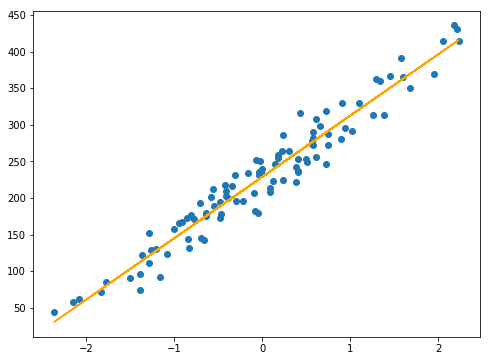

In [38]:
# let's plot the best fit line
lg.plot_bestFitLine()

In [39]:
# let's predict some value
lg.predict(np.array([50])) # works fine

99.95949044008543

In [40]:
# now let's try with datasets with more than 1 feature
x1 = np.random.randn(100, 10)
y1 = np.random.randn(100)
lg.fit(x1, y1)

In [41]:
# some random testings----------
a = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [1, 1, 6, 7]])
print(a)
print(np.mean(a, axis=0))
a -np.mean(a, axis=0)

[[1 2 3 4]
 [2 3 4 5]
 [1 1 6 7]]
[1.33333333 2.         4.33333333 5.33333333]


array([[-0.33333333,  0.        , -1.33333333, -1.33333333],
       [ 0.66666667,  1.        , -0.33333333, -0.33333333],
       [-0.33333333, -1.        ,  1.66666667,  1.66666667]])

In [42]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [9, 10, 11]])
c = np.array([1, 2, 3])
np.dot(b, c)

array([14, 32, 50, 62])

In [43]:
a.T

array([[1, 2, 1],
       [2, 3, 1],
       [3, 4, 6],
       [4, 5, 7]])

In [44]:
a = np.array([1, 2, 3])
(a**2).sum()

14

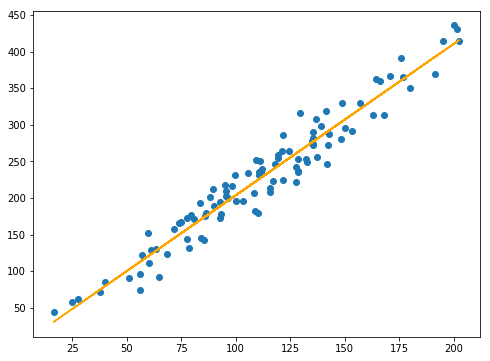

In [72]:
# Observing the difference between best fit lines before scaling and after scaling

from sklearn.linear_model import LinearRegression

lg1 = LinearRegression()
lg1.fit(x.reshape(-1, 1), y.reshape(-1, 1))
pred = lg1.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, pred, color='orange')
plt.savefig('fig1.png')

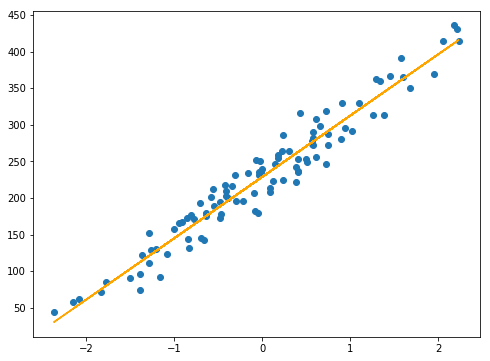

In [73]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
sd.fit(x.reshape(-1, 1))
x22 = sd.transform(x.reshape(-1, 1))
lg2 = LinearRegression()
lg2.fit(x22, y)
plt.figure(figsize=(8, 6))
pred2 = lg2.predict(x22)
plt.scatter(x22, y)
plt.plot(x22, pred2, color='orange')
plt.savefig('fig2.png')

References<br>
https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent
<br>https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

<br>Interesting articles on normalize, standardize and scale
<br>https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/ 
<br>https://stackoverflow.com/questions/32108179/linear-regression-normalization